In [22]:
from nbdt.model import SoftNBDT
from torchvision import transforms
from nbdt.utils import DATASET_TO_CLASSES, load_image_from_path, maybe_install_wordnet
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img #Loadimg lets you load images in a specific format from local files
from nbdt.hierarchy import generate_hierarchy
from nbdt.models import wrn28_10_cifar10

In [23]:
model = wrn28_10_cifar10(pretrained=True)
# generate_hierarchy(dataset='CIFAR10', arch='wrn28_10_cifar10', model=model, method=None)
model = SoftNBDT(
  pretrained=True,
  dataset='CIFAR10',
  arch='wrn28_10_cifar10',
  model=model,
  )

transforms = transforms.Compose([
  transforms.Resize(32),
  transforms.CenterCrop(32),
  transforms.ToTensor(),
  transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

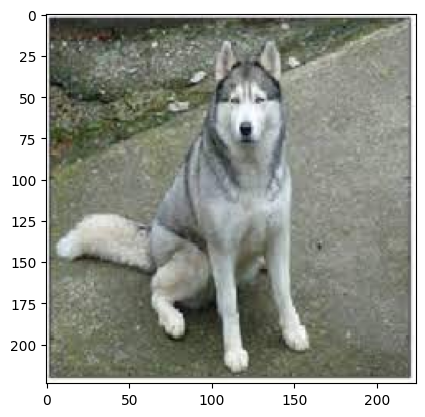

In [28]:
img1 = load_img('/Users/divyamkumar/Documents/GitHub/XRetFound/Mentorship/images/husky.jpg', target_size=(224, 224))
plt.imshow(img1)
plt.show()

im = load_image_from_path("/Users/divyamkumar/Documents/GitHub/XRetFound/Mentorship/images/husky.jpg")
x = transforms(im)[None]

In [29]:
outputs = model(x)  # to get intermediate decisions, use `model.forward_with_decisions(x)` and add `hierarchy='wordnet' to SoftNBDT
dt = DATASET_TO_CLASSES['CIFAR10']

order = [(str(dt[i]), list(outputs.detach().numpy()[0])[i]) for i in range(len(dt))]
temp = [print(str(x) + ": " + str(y)) for (x, y) in order]


airplane: 0.003154526
automobile: 0.0016924031
bird: 0.005907976
cat: 0.005853992
deer: 0.0047255023
dog: 0.9693028
frog: 0.0018607592
horse: 0.0046347384
ship: 0.0014207117
truck: 0.0014466534


In [26]:
_, predicted = outputs.max(1)
cls = dt[predicted]
print(cls)


dog
